# Первичный анализ и предобработка данных с Pandas

В этом задании рассмотрим первичный анализ данных на примере реальных данных по шоколадным батончикам. Данные содержат следующие атрибуты: 'company' - компания производитель, 'bar_name' - название шоколадного батончика, 'ref' - номер, 'rew_date' - дата оценки, 'percent' - процент какао бобов, 'company_loc' - местонахождение компании, 'rate' - рейтинг, 'bean_dtype' - тип какао бобов, 'bean_orig' - страна происхождения.

## Численные атрибуты

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
best_bar= pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [4]:
type(best_bar)

pandas.core.frame.DataFrame

Оставим только местонахождение компании, рейтинг, процент какао бобов и страну происхождения для дальнейшего анализа.

In [5]:
best_bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]
best_bar.head() 

,company_loc,rate,percent,bean_orig
0,France,3.75,63%,Sao Tome
1,France,2.75,70%,Togo
2,France,3.00,70%,Togo
3,France,3.50,70%,Togo
4,France,3.50,70%,Peru


Необходимо построить гистограмму распределения рейтинга батончика через plot(). Количество столбцов гистограммы равно 20. На одном графике необходимо построить график плотности вероятности, который строится на основе оценки непрерывного распределения вероятности. Гистограммы аппроксимируют комбинацией ядре, т.е. более простых распределений, например нормального (распределение Гаусса). Поэтому графики плотности еще называют ядерной оценки плотности (KDE-kernel density estimate). Строится kde с помощью функции плот с параметром kind='kde'.

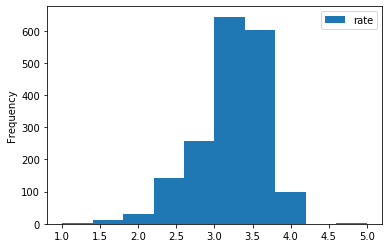

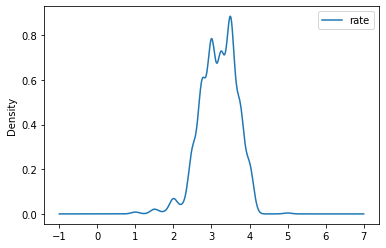

In [6]:
best_bar.plot(y='rate', kind='hist')
best_bar.plot(y='rate', kind='kde')
plt.show()

Сделала еще гистограмму через kind='bar', чтобы каждое значение было отдельно и хорошо просматривалось.

In [7]:
best_bar.rate.unique()

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

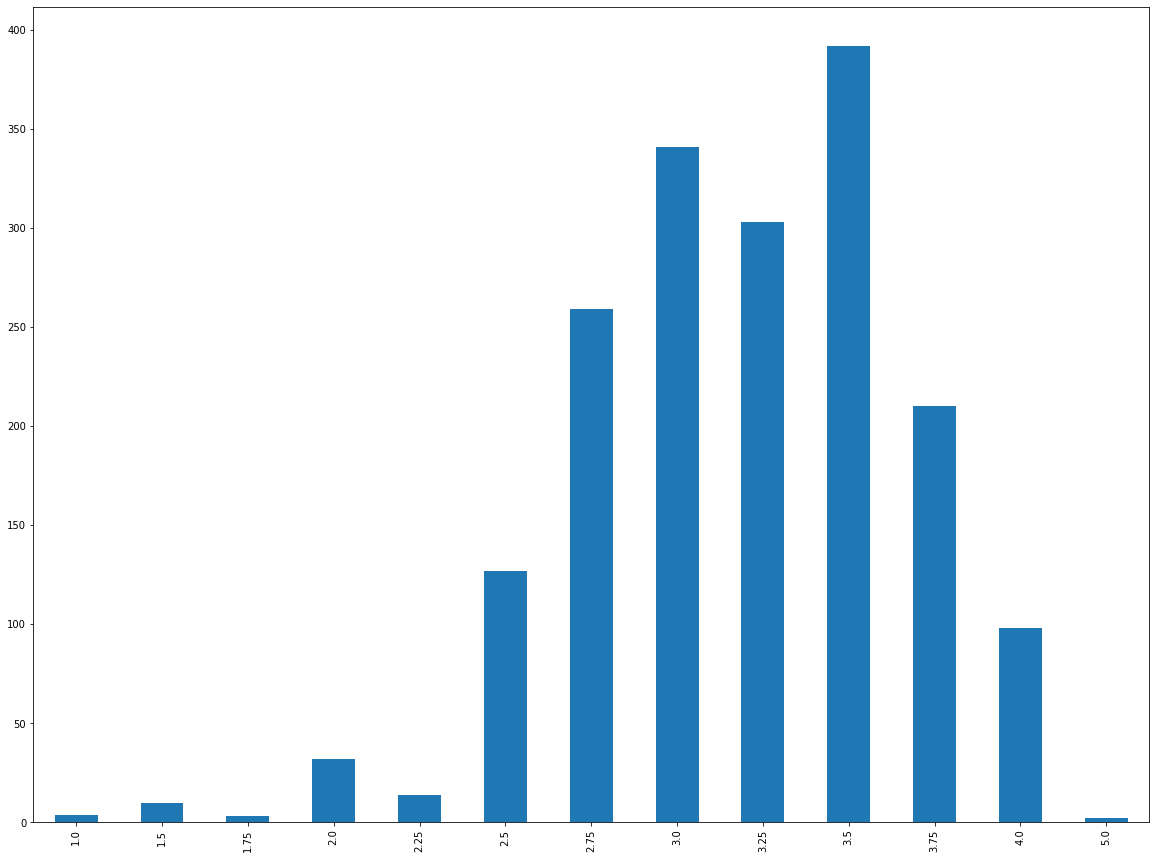

In [8]:
best_bar.rate.value_counts().sort_index().plot(kind='bar', figsize=(20, 15))
plt.show()

Необходимо построить гистограмму распределения для процента какао бобов. Однако, следует отметить, что данные атрибут имеет тип object. Гистограмму для такого типа построить не получится. 
Необходимо преобразовать данный тип в float с помощью функции apply. Внутри функции apply используйте lambda выражение, чтобы убрать знак '%' в конце каждого элемента, а затем преобразовать данные в тип с плавающей точкой.

In [9]:
best_bar.percent.dtype

dtype('O')

In [10]:
best_bar.percent = best_bar.percent.apply(lambda x: float(x[:-1]))
best_bar.dtypes

company_loc     object
rate           float64
percent        float64
bean_orig       object
dtype: object

In [11]:
best_bar.sample(5)

,company_loc,rate,percent,bean_orig
1652,U.S.A.,3.75,73.0,Uganda
1754,U.S.A.,3.00,70.0,Costa Rica
618,St. Lucia,3.25,70.0,St. Lucia
1614,Japan,3.25,62.0,Papua New Guinea
655,Puerto Rico,2.75,70.0,Domincan Republic


Постройте scatter plot зависимости рейтинга батончика от процента какао бобов, используя метод plot для Pandas DataFrame с аргументом kind='scatter'. Подпишите картинку.
Необходимо это для того, чтобы оценить зависимость рейтинга от содержания кокао в батончиках. 

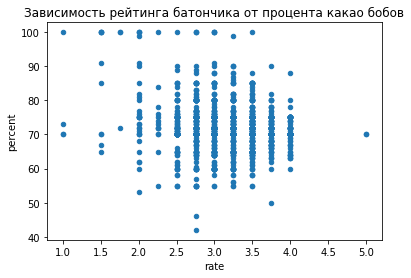

In [12]:
best_bar.plot(x='rate', y='percent', kind='scatter', 
              title='Зависимость рейтинга батончика от процента какао бобов')
plt.show()

Постройте "ящик с усами" для числовых распределений с помощью функции boxplot. Возпользуйтесь также функцией describe() для каждого распределения.

In [13]:
best_bar.dtypes

company_loc     object
rate           float64
percent        float64
bean_orig       object
dtype: object

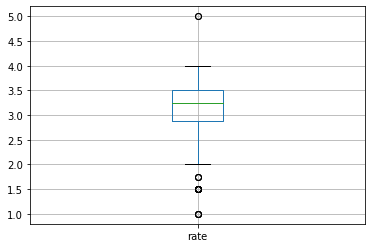

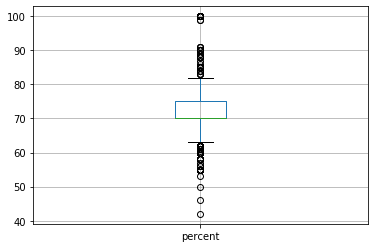

In [14]:
best_bar.boxplot(column='rate')
plt.show()
best_bar.boxplot(column='percent')
plt.show()

In [15]:
best_bar.describe()

,rate,percent
count,1795.000000,1795.000000
mean,3.185933,71.698329
std,0.478062,6.323118
min,1.000000,42.000000
25%,2.875000,70.000000
50%,3.250000,70.000000
75%,3.500000,75.000000
max,5.000000,100.000000


## Категориальные атрибуты

Обратим внимание на категориальные признаки. Построить гистограмму распределения не удастся, но в качестве начального анализа можно воспользоваться функцией value_counts, которая позволяет вывести количество встречающихся значений в атрибуте данных. Обратите внимание внимание на места происхождения бобов, которые редко встречаются в наборе данных. Для вывода начальных и конечных элементов используются функции head() и tail() соответственно.

In [16]:
best_bar.columns

Index(['company_loc', 'rate', 'percent', 'bean_orig'], dtype='object')

In [17]:
company_loc = best_bar.company_loc.value_counts()
company_loc.head()

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: company_loc, dtype: int64

In [18]:
bean_orig = best_bar.bean_orig.value_counts()
bean_orig.tail()

Gre., PNG, Haw., Haiti, Mad    1
Cameroon                       1
Ecuador, Mad., PNG             1
Indonesia, Ghana               1
Mad., Java, PNG                1
Name: bean_orig, dtype: int64

После того, как выведено количество уникальных значений можно представить их визуальное распределение с помощью функции plot(kind='bar').

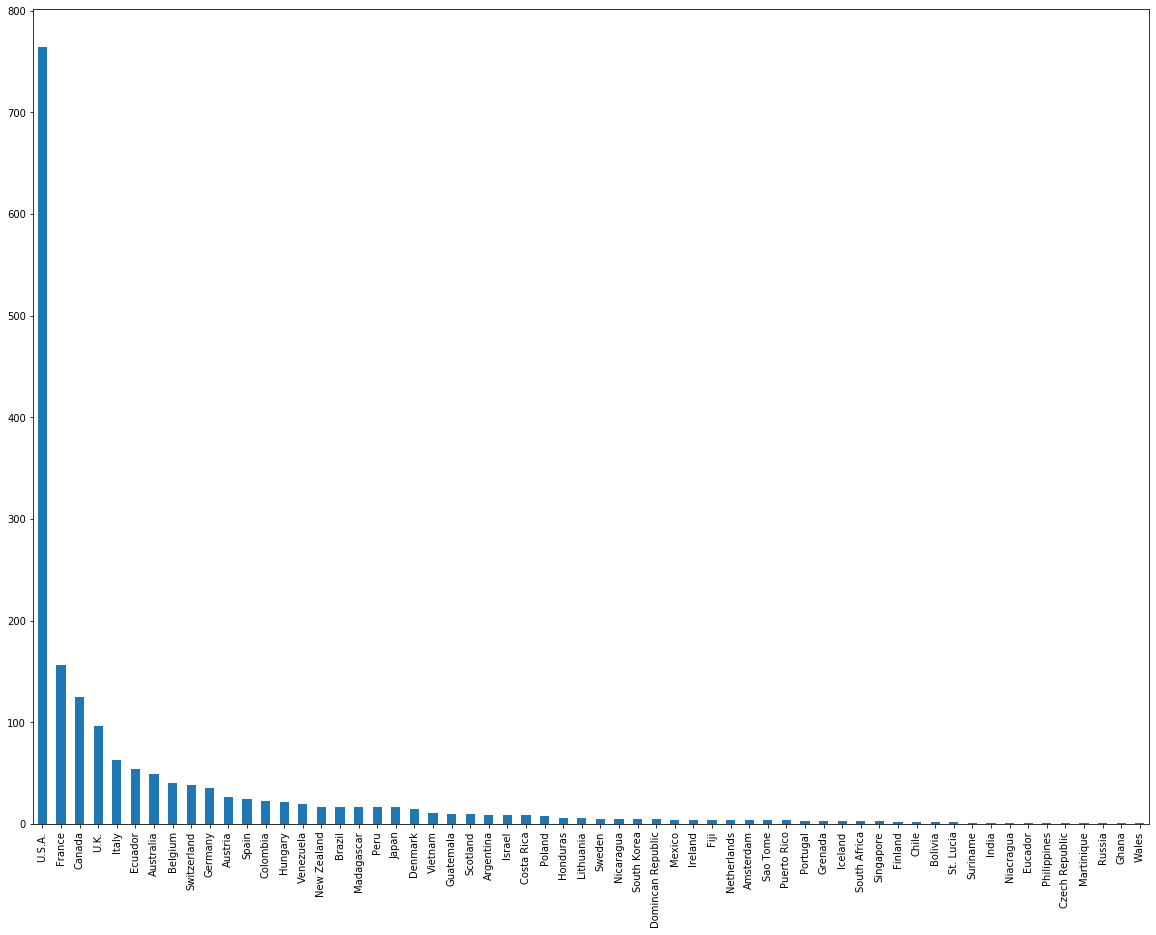

In [19]:
company_loc.plot(kind='bar', figsize=(20, 15))
plt.show()

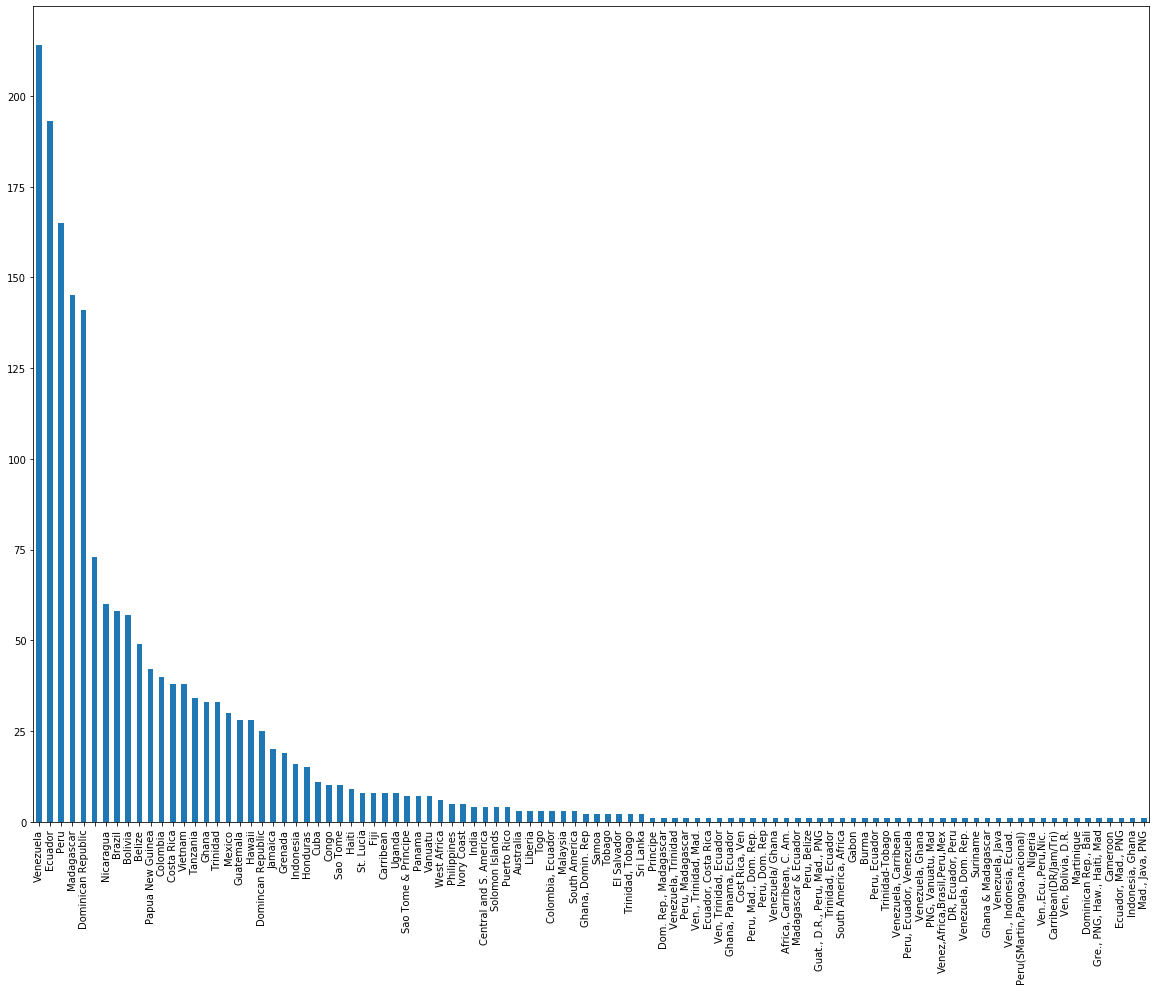

In [20]:
bean_orig.plot(kind='bar', figsize=(20, 15))
plt.show()

По гистограмме распределения категориальных атрибутов о происхождения какао бобов можно увидеть, что присутствует хаос в данных. Для некоторых объектов названия мест происхождения написаны с ошибками, у некоторых объектов вообще отсутствует место происхождения, а так же есть батончики, состоящие из какао бобов из разных мест происхождения. В этой связи необходимо произвести предобработку данных для дальнейшего анализа.
Для начала убрать объекты с пропущенными записями, используя функцию dropna. Необходимо отметить, что в качестве параметров функции передается 'axis': где 0 - удалять по строкам (объектам), 1 - удалять по столбцам (признакам); 'how': где 'any' - удалять строку или столбец, если есть пустой объект, 'all' - удалять строку или столбец, если все объекты пустые.  

In [21]:
best_bar.bean_orig[best_bar.bean_orig.isna()]

1072    NaN
Name: bean_orig, dtype: object

In [22]:
best_bar.iloc[1072]

company_loc    U.S.A.
rate              2.5
percent            72
bean_orig         NaN
Name: 1072, dtype: object

In [23]:
best_bar.dropna(axis=0, how='any', inplace=True)

In [24]:
best_bar.bean_orig[best_bar.bean_orig.isna()]

Series([], Name: bean_orig, dtype: object)

Заметим, что пустые записи из атрибута происхождения бобов не удалилсь. Значит "пустые" записи не являются пустыми. Выведите все уникальные значения атрибута 'bean_orig' с помощью функции unique() и найдите значение пустой записи.

In [25]:
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

Для того, чтобы исключить данный элемент, необходимо использовать слудующую конструкцию: best_bar['bean_orig'] != 'element value', которая вернет бинарный массив элементов, где True - атрибут объекта не принимает значение 'element value', False - атрибут объекта принимает значение 'element value'. Затем полученную бинарную матрицу передаем в качестве маски, по которой будут выбраны объекты из нашего массива данных.

In [26]:
best_bar = best_bar[best_bar.bean_orig != '\xa0']
best_bar.bean_orig.unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Domincan Republic',
       'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago', 'Peru

Помимо этого необходимо решить проблему с батончиками из разных какао бобов. Лучшим способом является обработка и разделение этих составных бобов. Но на данном этапе, в виду их малого вклада, мы уберем их и сделаем одним видом сложного состава 'complex'. Будем считать редковстречающимися, если в выборке их не более 5.

In [27]:
best_bar.bean_orig[best_bar.bean_orig.str.split(',')
                   .apply(lambda cell: len(cell)) > 1] = 'complex'

/home/lexsirius/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/lexsirius/venv/lib/python3.7/site-packages/pandas/core/generic.py:9116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/home/lexsirius/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_

In [28]:
'complex' in best_bar.bean_orig.unique()

True

Постройте круговую гистограмму распределения для стран производителей какао бобов с помощью функции pie().

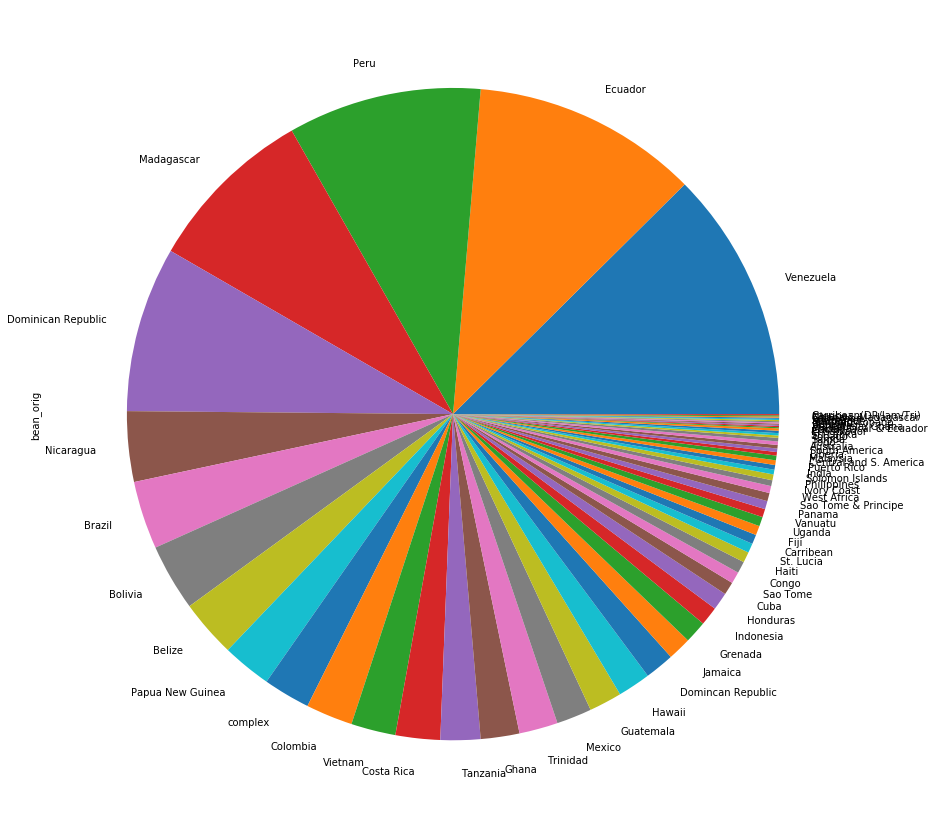

In [29]:
bean_orig = best_bar.bean_orig.value_counts()
bean_orig.plot.pie(figsize=(20, 15))
plt.show()

## Попарные графики распределений

In [30]:
from sklearn import preprocessing
from seaborn import pairplot

Построить попарные распределения для всех признаков.

In [42]:
best_bar.head()

,company_loc,rate,percent,bean_orig
0,France,3.75,63.0,Sao Tome
1,France,2.75,70.0,Togo
2,France,3.00,70.0,Togo
3,France,3.50,70.0,Togo
4,France,3.50,70.0,Peru


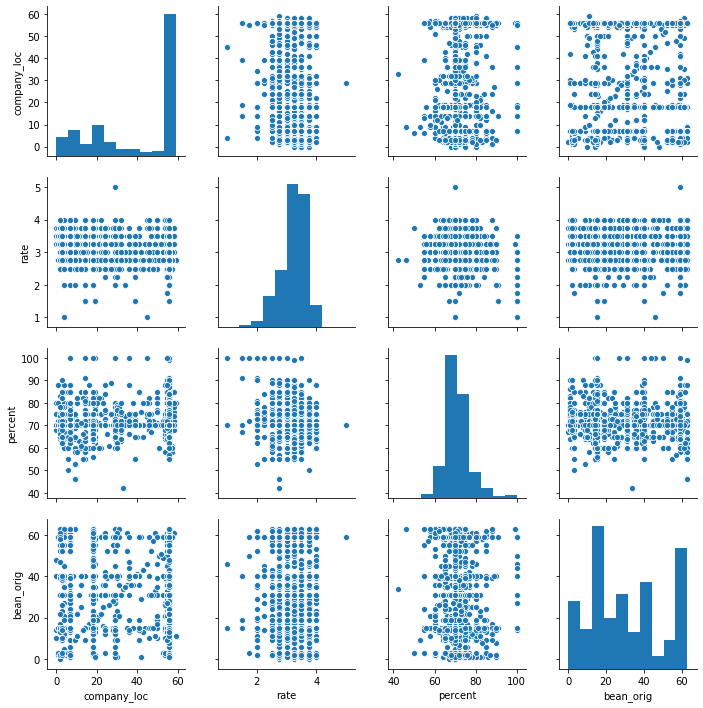

In [50]:
best_bar_encoder = best_bar.copy()

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(best_bar.company_loc)
best_bar_encoder.company_loc = label_encoder.transform(best_bar.company_loc)

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(best_bar.bean_orig)
best_bar_encoder.bean_orig = label_encoder.transform(best_bar.bean_orig)

# best_bar_encoder
pairplot(data=best_bar_encoder)

Определите, где растут лучшие какао бобы, вычислив средний значение и медиану рейтинга батончика для каждого места происхождения. Напишите первую тройку лучших в обоих случаях.

In [32]:
best_bar.groupby(by='bean_orig')\
        .aggregate('mean')\
        .rate.sort_values(ascending=False)[:3]

bean_orig
South America       3.666667
Tobago              3.625000
Venezuela/ Ghana    3.500000
Name: rate, dtype: float64

In [33]:
best_bar.groupby(by='bean_orig')\
        .aggregate('median')\
        .rate.sort_values(ascending=False)[:3]

bean_orig
Tobago           3.625
South America    3.500
Honduras         3.500
Name: rate, dtype: float64

Определить, где производят лучшие батончики, вычислив среднее значение и медиану рейтинга батончика для каждого места происхождения.

In [34]:
best_bar.groupby(by='company_loc')\
        .aggregate('mean')\
        .rate.sort_values(ascending=False)[:3]

company_loc
Chile          3.75
Amsterdam      3.50
Netherlands    3.50
Name: rate, dtype: float64

In [35]:
best_bar.groupby(by='company_loc')\
        .aggregate('median')\
        .rate.sort_values(ascending=False)[:3]

company_loc
Chile        3.75
Amsterdam    3.50
Canada       3.50
Name: rate, dtype: float64